In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('Dataset/Athens.csv')
data = data.dropna()
data.head()

,last_update_date,N_qubits,N_cx,N_measures,cx_0_1,cx_0_2,cx_0_3,cx_0_4,cx_1_0,cx_1_2,...,T2_3,readout_error_3,T1_4,T2_4,readout_error_4,0,1,2,3,4
6,2020-05-03 10:03:21+02:00,5,1,5,0,0,0,0,0,0,...,24.146419,0.016667,53.144192,76.958280,0.023333,4.0,3.0,2.0,1.0,0.0
7,2020-12-07 23:06:24+01:00,5,14,5,0,2,2,0,0,0,...,25.182228,0.016700,72.930044,64.517835,0.053200,2.0,4.0,1.0,3.0,0.0
8,2020-10-12 08:09:48+02:00,5,6,5,0,0,0,0,0,0,...,28.745950,0.014700,49.958010,72.354731,0.015900,0.0,2.0,1.0,3.0,4.0
9,2020-09-10 13:25:58+02:00,5,17,5,2,0,0,2,0,0,...,44.439039,0.012200,60.279715,82.984785,0.045000,4.0,1.0,0.0,3.0,2.0
13,2020-08-10 07:36:22+02:00,5,13,5,0,0,0,0,0,0,...,45.842043,0.022900,39.173300,115.457597,0.018300,2.0,0.0,3.0,1.0,4.0


In [7]:
data.describe()

,N_qubits,N_cx,N_measures,cx_0_1,cx_0_2,cx_0_3,cx_0_4,cx_1_0,cx_1_2,cx_1_3,...,T2_3,readout_error_3,T1_4,T2_4,readout_error_4,0,1,2,3,4
count,26758.0,26758.000000,26758.0,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,...,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000,26758.000000
mean,5.0,18.023582,5.0,0.890388,0.897638,0.892854,0.942186,0.895620,0.900815,0.903917,...,28.690426,0.021037,73.722044,97.823891,0.025531,2.340907,2.198072,1.984939,1.816802,1.659279
std,0.0,11.638030,0.0,1.320879,1.322733,1.304914,1.350179,1.317961,1.314515,1.317429,...,7.757541,0.018314,18.434643,26.030474,0.032152,1.533206,1.320012,1.246424,1.308005,1.528866
min,5.0,0.000000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.655053,0.006667,18.175365,20.052230,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0,9.000000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.904865,0.013700,63.017605,83.442709,0.017200,1.000000,1.000000,1.000000,1.000000,0.000000
50%,5.0,16.000000,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.503428,0.016600,72.560030,97.028996,0.018900,3.000000,3.000000,2.000000,1.000000,1.000000
75%,5.0,24.000000,5.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,29.060094,0.021200,86.548641,115.768415,0.023200,4.000000,3.000000,3.000000,3.000000,3.000000
max,5.0,69.000000,5.0,10.000000,12.000000,10.000000,10.000000,9.000000,10.000000,11.000000,...,51.124149,0.142900,120.689733,171.405016,0.262300,4.000000,4.000000,4.000000,4.000000,4.000000


In [8]:
len(data)

26758

In [9]:
y = data[['0', '1', '2', '3', '4']]
print(y.shape)
y.head()

(26758, 5)


,0,1,2,3,4
6,4.0,3.0,2.0,1.0,0.0
7,2.0,4.0,1.0,3.0,0.0
8,0.0,2.0,1.0,3.0,4.0
9,4.0,1.0,0.0,3.0,2.0
13,2.0,0.0,3.0,1.0,4.0


In [10]:
X = data.drop(columns=['0', '1', '2', '3', '4', 'last_update_date'])
print(X.shape)
X.head()

(26758, 78)


,N_qubits,N_cx,N_measures,cx_0_1,cx_0_2,cx_0_3,cx_0_4,cx_1_0,cx_1_2,cx_1_3,...,readout_error_1,T1_2,T2_2,readout_error_2,T1_3,T2_3,readout_error_3,T1_4,T2_4,readout_error_4
6,5,1,5,0,0,0,0,0,0,0,...,0.0350,106.488868,119.982326,0.011667,80.320345,24.146419,0.016667,53.144192,76.958280,0.023333
7,5,14,5,0,2,2,0,0,0,0,...,0.0428,110.162150,157.132011,0.013700,94.374982,25.182228,0.016700,72.930044,64.517835,0.053200
8,5,6,5,0,0,0,0,0,0,2,...,0.0137,120.966078,94.106302,0.012300,157.856674,28.745950,0.014700,49.958010,72.354731,0.015900
9,5,17,5,2,0,0,2,0,0,0,...,0.0144,91.449658,153.575729,0.013900,60.967640,44.439039,0.012200,60.279715,82.984785,0.045000
13,5,13,5,0,0,0,0,0,0,0,...,0.0153,105.477772,178.278446,0.018400,102.119128,45.842043,0.022900,39.173300,115.457597,0.018300


In [11]:
# from tensorflow.keras.layers import Layer

# class argmax_layer(Layer):
#     def __init__(self):
#         super(argmax_layer, self).__init__()
        
#     def call(self, inputs):
#         return tf.math.argmax(inputs, axis=1)

In [12]:
inputs = keras.Input(shape=(78,))

In [13]:
inputs.shape

TensorShape([None, 78])

In [14]:
# General block
layer1 = layers.Dense(264, activation='softmax')
layer2 = layers.Dense(1024, activation='softmax')
dropout_layer = layers.Dropout(0.5)

# Make the models
temp = layer1(inputs)
temp = layer2(temp)
temp = dropout_layer(temp)

2023-03-22 19:05:26.070248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Make two slots
slot1_layer1 = layers.Dense(256, activation='softmax')
slot1_layer2 = layers.Dense(128, activation='softmax')
slot1_layer3 = layers.Dense(5, activation='softmax')

slot2_layer1 = layers.Dense(256, activation='softmax')
slot2_layer2 = layers.Dense(128, activation='softmax')
slot2_layer3 = layers.Dense(5, activation='softmax')

slot3_layer1 = layers.Dense(256, activation='softmax')
slot3_layer2 = layers.Dense(128, activation='softmax')
slot3_layer3 = layers.Dense(5, activation='softmax')

slot4_layer1 = layers.Dense(256, activation='softmax')
slot4_layer2 = layers.Dense(128, activation='softmax')
slot4_layer3 = layers.Dense(5, activation='softmax')

slot5_layer1 = layers.Dense(256, activation='softmax')
slot5_layer2 = layers.Dense(128, activation='softmax')
slot5_layer3 = layers.Dense(5, activation='softmax')

# reshape_layer = layers.Reshape([5])

In [159]:
out1 = slot1_layer1(temp)
out1 = slot1_layer2(out1)
out1 = slot1_layer3(out1)
# out1 = reshape_layer(out1)


out2 = slot2_layer1(temp)
out2 = slot2_layer2(out2)
out2 = slot2_layer3(out2)
# out2 = reshape_layer(out2)


out3 = slot3_layer1(temp)
out3 = slot3_layer2(out3)
out3 = slot3_layer3(out3)
# out3 = reshape_layer(out3)


out4 = slot4_layer1(temp)
out4 = slot4_layer2(out4)
out4 = slot4_layer3(out4)
# out4 = reshape_layer(out4)


out5 = slot5_layer1(temp)
out5 = slot5_layer2(out5)
out5 = slot5_layer3(out5)
out5 = layers.Dropout(0.5)(out5)
# out5 = reshape_layer(out5)


outputs = tf.convert_to_tensor([out1, out2, out3, out4, out5])
# outputs = tf.squeeze(outputs)

In [160]:
model = keras.Model(inputs=inputs, outputs=outputs, name='neural_layout')

In [161]:
model.summary()

Model: "neural_layout"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 78)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 264)          20856       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1024)         271360      ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 1024)         0           ['dense_1[0][0]']                
                                                                                      

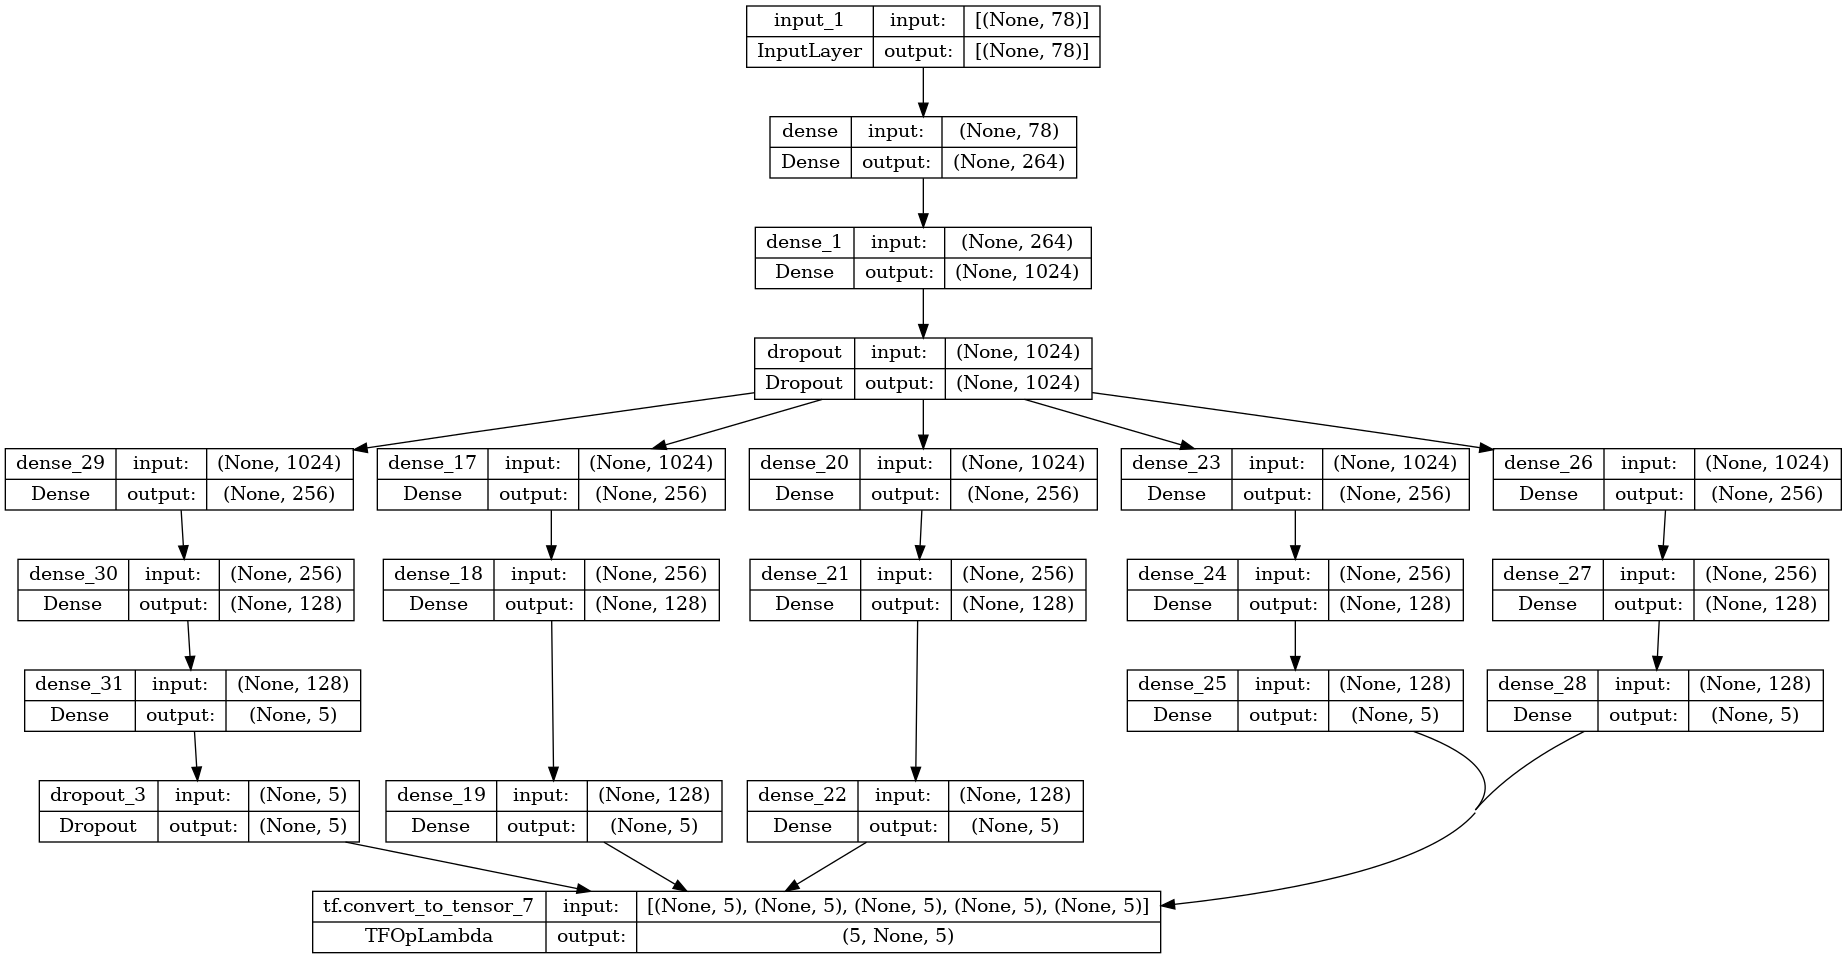

In [162]:
keras.utils.plot_model(model, 'first_attempt.png', show_shapes=True)

## Custom Training Loop

In [164]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [165]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21406, 78)
(21406, 5)
(5352, 78)
(5352, 5)


In [176]:
EPOCHS = 2
BATCH_SIZE = 1

In [177]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

In [178]:
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [179]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

In [180]:
training_losses = []

for epoch in range(EPOCHS):
    print(f"Start of epoch: {epoch}")
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        y_batch_train = np.reshape(y_batch_train, (5, 1))
        loss_value = train_step(x_batch_train, y_batch_train)
        if step % 200 == 0:
            training_losses.append(float(loss_value))
    train_acc = train_acc_metric.result()
    print(f"Training acc over epoch: {float(train_acc)}\n")

Start of epoch: 0
Training acc over epoch: 0.3411940634250641

Start of epoch: 1
Training acc over epoch: 0.34154441952705383



In [181]:
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_acc_metric.update_state(y, val_logits)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

In [182]:
for x_batch_val, y_batch_val in test_dataset:
        y_batch_val = np.reshape(y_batch_val, (5, 1))
        test_step(x_batch_val, y_batch_val)

In [183]:
val_acc = val_acc_metric.result()
val_acc_metric.reset_states()
print("Validation acc: %.4f" % (float(val_acc),))

Validation acc: 0.3624


In [184]:
a = X_test.iloc[0]
a = a.values.reshape(1, 78)
a.shape

(1, 78)

In [185]:
preds = model.predict(a)
preds

1/1 [==============================] - 0s 142ms/step


array([[[0.0959617 , 0.07251822, 0.06875272, 0.06641633, 0.69635105]],

       [[0.07206752, 0.07515684, 0.07158615, 0.7106636 , 0.07052588]],

       [[0.06566832, 0.073679  , 0.72671527, 0.0680971 , 0.06584036]],

       [[0.06659909, 0.703322  , 0.08086658, 0.07870373, 0.07050854]],

       [[0.5119887 , 0.10927235, 0.1128117 , 0.12388025, 0.1420469 ]]],
      dtype=float32)

In [186]:
b = y_test.iloc[50]
b

0    2.0
1    0.0
2    4.0
3    1.0
4    3.0
Name: 51518, dtype: float64

In [187]:
for v in preds:
    v = np.reshape(v, (5, 1))
    print(tf.math.argmax(v))

tf.Tensor([4], shape=(1,), dtype=int64)
tf.Tensor([3], shape=(1,), dtype=int64)
tf.Tensor([2], shape=(1,), dtype=int64)
tf.Tensor([1], shape=(1,), dtype=int64)
tf.Tensor([0], shape=(1,), dtype=int64)
